### Data exploration exercise using R
#### In this document tried various data exploration exercise.
#### Grouping it under (shop, item) totals and finding frequencies. Major finds are as follows : 
#### (1) 30% of the frequencies (of unique shop, item pairs) were of "1" count sold. And 65% were between "1" and "6" counts sold. This distribution showed a very "poisson" like histogram.
#### (2) Shapiro "normalization" test for total item counts for every pair (shopID, ItemID) showed "Reject H0 for normalized test"

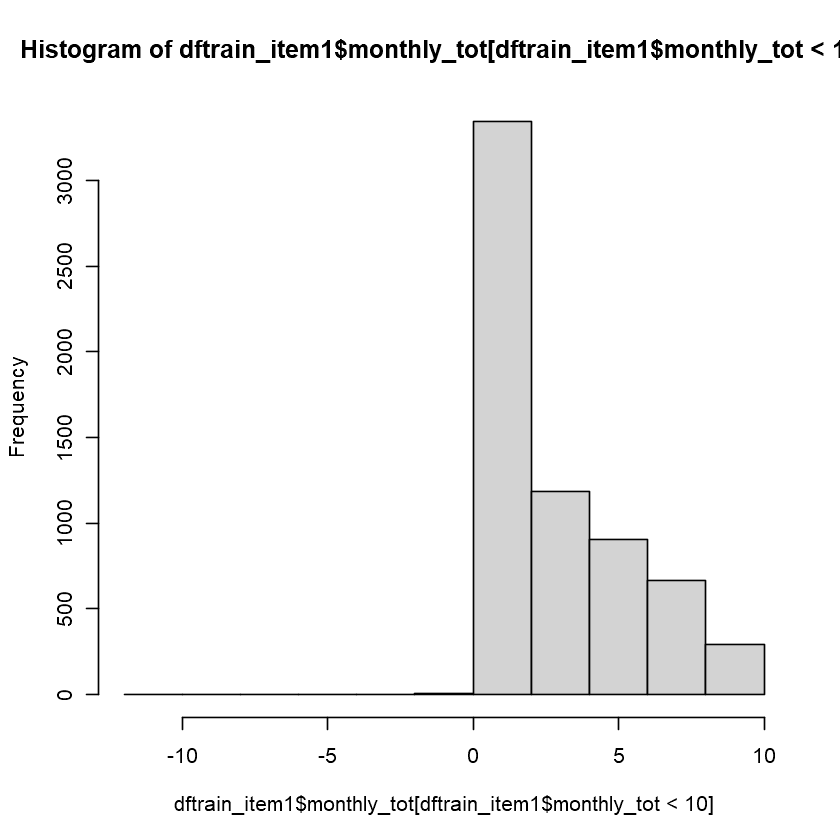

In [1]:
library(dplyr)

Warning message:
"package 'dplyr' was built under R version 4.0.5"

Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




In [2]:
dftrain1 = read.csv('sales_train.csv/sales_train.csv')

In [3]:
dftest1 = read.csv('test.csv/test.csv')

In [5]:
dftrain2.1 = dftrain1 %>% mutate(textual_id = paste(shop_id, 'x', item_id, sep='')) %>% 
                        group_by(textual_id, date_block_num) %>% 
                        summarise( tot_per_month=sum(item_cnt_day))
                     

`summarise()` has grouped output by 'textual_id'. You can override using the `.groups` argument.



In [23]:
tot_per_month = rep(0, 34*length(unique(dftrain2.1$textual_id)))

In [21]:
date_block_num = rep(0:33, length(unique(dftrain2.1$textual_id)))

In [22]:
textual_id = rep(unique(dftrain2.1$textual_id), each=34)

In [28]:
dftrain3.1 = data.frame(textual_id, date_block_num, tot_per_month)

In [34]:
length(tot_per_month)
length(date_block_num)
length(textual_id)
nrow(dftrain3.1)
rm(tot_per_month,date_block_num,textual_id)

[1] 14420216

[1] 14420216

[1] 14420216

[1] 14420216

In [37]:
dftrain2.2 = rbind(dftrain2.1, dftrain3.1)
dftrain2.2

textual_id date_block_num tot_per_month
1        0x1000     0               5           
2        0x1000     1               4           
3        0x10004    1               1           
4        0x1001     0               2           
5        0x10012    0               1           
6        0x10012    1               2           
7        0x1002     0               2           
8        0x1003     0               2           
9        0x10033    1               1           
10       0x10038    1               1           
11       0x10039    0               2           
12       0x10039    1               1           
13       0x1004     1               3           
14       0x10048    0               1           
15       0x1005     1               1           
16       0x10051    0               4           
17       0x10051    1               1           
18       0x10063    0               3           
19       0x10064    0               2           
20       0x10064    1               2           
21       0x10080    0               1           
22       0x10081    0               1           
23       0x10086    0               4           
24       0x10086    1               1           
25       0x10088    0               2           
26       0x10089    0               1           
27       0x10097    1               3           
28       0x10106    0              10           
29       0x10106    1               5           
30       0x10107    0               2           
...      ...        ...            ...          
16029311 9x9904      4             0            
16029312 9x9904      5             0            
16029313 9x9904      6             0            
16029314 9x9904      7             0            
16029315 9x9904      8             0            
16029316 9x9904      9             0            
16029317 9x9904     10             0            
16029318 9x9904     11             0            
16029319 9x9904     12             0            
16029320 9x9904     13             0            
16029321 9x9904     14             0            
16029322 9x9904     15             0            
16029323 9x9904     16             0            
16029324 9x9904     17             0            
16029325 9x9904     18             0            
16029326 9x9904     19             0            
16029327 9x9904     20             0            
16029328 9x9904     21             0            
16029329 9x9904     22             0            
16029330 9x9904     23             0            
16029331 9x9904     24             0            
16029332 9x9904     25             0            
16029333 9x9904     26             0            
16029334 9x9904     27             0            
16029335 9x9904     28             0            
16029336 9x9904     29             0            
16029337 9x9904     30             0            
16029338 9x9904     31             0            
16029339 9x9904     32             0            
16029340 9x9904     33             0

In [39]:
dftrain2.3 = dftrain2.2 %>% group_by(textual_id, date_block_num) %>% 
                        summarise( tot_per_month=sum(tot_per_month))

`summarise()` has grouped output by 'textual_id'. You can override using the `.groups` argument.



In [40]:

dftrain2 = dftrain2.3 %>% group_split()
dftrain_keys = dftrain2.3 %>% group_keys()
str(dftrain2)
str(dftrain_keys)


list<tibble[,3]> [1:424124] 
$ : tibble [34 x 3] (S3: tbl_df/tbl/data.frame)
 ..$ textual_id    : chr [1:34] "0x1000" "0x1000" "0x1000" "0x1000" ...
 ..$ date_block_num: int [1:34] 0 1 2 3 4 5 6 7 8 9 ...
 ..$ tot_per_month : num [1:34] 5 4 0 0 0 0 0 0 0 0 ...
$ : tibble [34 x 3] (S3: tbl_df/tbl/data.frame)
 ..$ textual_id    : chr [1:34] "0x10004" "0x10004" "0x10004" "0x10004" ...
 ..$ date_block_num: int [1:34] 0 1 2 3 4 5 6 7 8 9 ...
 ..$ tot_per_month : num [1:34] 0 1 0 0 0 0 0 0 0 0 ...
$ : tibble [34 x 3] (S3: tbl_df/tbl/data.frame)
 ..$ textual_id    : chr [1:34] "0x1001" "0x1001" "0x1001" "0x1001" ...
 ..$ date_block_num: int [1:34] 0 1 2 3 4 5 6 7 8 9 ...
 ..$ tot_per_month : num [1:34] 2 0 0 0 0 0 0 0 0 0 ...
$ : tibble [34 x 3] (S3: tbl_df/tbl/data.frame)
 ..$ textual_id    : chr [1:34] "0x10012" "0x10012" "0x10012" "0x10012" ...
 ..$ date_block_num: int [1:34] 0 1 2 3 4 5 6 7 8 9 ...
 ..$ tot_per_month : num [1:34] 1 2 0 0 0 0 0 0 0 0 ...
$ : tibble [34 x 3] (S3: tbl_df/tbl

tibble [424,124 x 1] (S3: tbl_df/tbl/data.frame)
 $ textual_id: chr [1:424124] "0x1000" "0x10004" "0x1001" "0x10012" ...


In [41]:
which(dftrain_keys=='5x30')

dftrain2[398438]

[1] 398438

In [42]:
dftrain2[398438]

<list_of<
  tbl_df<
    textual_id    : character
    date_block_num: integer
    tot_per_month : double
  >
>[1]>
[[1]]
# A tibble: 34 x 3
   textual_id date_block_num tot_per_month
   <chr>               <int>         <dbl>
 1 5x30                    0             0
 2 5x30                    1             5
 3 5x30                    2             7
 4 5x30                    3             1
 5 5x30                    4             0
 6 5x30                    5             0
 7 5x30                    6             0
 8 5x30                    7             0
 9 5x30                    8             0
10 5x30                    9             1
# ... with 24 more rows

In [ ]:
str(dftrain2[34592])

In [19]:
dftrain2[[34592]]$textual_id

[1] "15x21404" "15x21404" "15x21404" "15x21404" "15x21404" "15x21404"
 [7] "15x21404" "15x21404" "15x21404" "15x21404" "15x21404" "15x21404"

In [6]:
glimpse(dftrain2)

list<tibble[,3]> [1:424124] 
$ : tibble [2 x 3] (S3: tbl_df/tbl/data.frame)
$ : tibble [1 x 3] (S3: tbl_df/tbl/data.frame)
$ : tibble [1 x 3] (S3: tbl_df/tbl/data.frame)
$ : tibble [2 x 3] (S3: tbl_df/tbl/data.frame)
$ : tibble [1 x 3] (S3: tbl_df/tbl/data.frame)
$ : tibble [1 x 3] (S3: tbl_df/tbl/data.frame)
$ : tibble [1 x 3] (S3: tbl_df/tbl/data.frame)
$ : tibble [1 x 3] (S3: tbl_df/tbl/data.frame)
$ : tibble [2 x 3] (S3: tbl_df/tbl/data.frame)
$ : tibble [1 x 3] (S3: tbl_df/tbl/data.frame)
$ : tibble [1 x 3] (S3: tbl_df/tbl/data.frame)
$ : tibble [1 x 3] (S3: tbl_df/tbl/data.frame)
$ : tibble [2 x 3] (S3: tbl_df/tbl/data.frame)
$ : tibble [1 x 3] (S3: tbl_df/tbl/data.frame)
$ : tibble [2 x 3] (S3: tbl_df/tbl/data.frame)
$ : tibble [1 x 3] (S3: tbl_df/tbl/data.frame)
$ : tibble [1 x 3] (S3: tbl_df/tbl/data.frame)
$ : tibble [2 x 3] (S3: tbl_df/tbl/data.frame)
$ : tibble [1 x 3] (S3: tbl_df/tbl/data.frame)
$ : tibble [1 x 3] (S3: tbl_df/tbl/data.frame)
$ : tibble [1 x 3] (S3: tbl_df/

In [57]:
data.frame(dftrain2[[1]])$tot_per_month

[1] 5 4

In [51]:
sht1 = dftrain2[[398438]]$tot_per_month
shapiro.test(sht1)


	Shapiro-Wilk normality test

data:  sht1
W = 0.42667, p-value = 2.128e-10


In [47]:
shapiro.test(data.frame(dftrain2[[398438]])$tot_per_month)


	Shapiro-Wilk normality test

data:  data.frame(dftrain2[[398438]])$tot_per_month
W = 0.42667, p-value = 2.128e-10


In [80]:
mapply(function(num){if (length(dftrain2[[num]]$tot_per_month)>1) {print(paste(num, ' looks good', 
                                length(dftrain2[[num]]$tot_per_month), dftrain2[[num]]$tot_per_month))} }, c(1:3))

[1] "1  looks good 2 5" "1  looks good 2 4"


[[1]]
[1] "1  looks good 2 5" "1  looks good 2 4"

[[2]]
NULL

[[3]]
NULL

In [61]:
shapfunSqrt = function(num){
  shapval = sqrt(dftrain2[[num]]$tot_per_month);
  ushapval = unique(shapval)
  if ( length(shapval)>2 && length(ushapval)>1 ) {
      paste(num, ': test', sep='');
      shapiro.test(shapval);
  }
}

shapfun = function(num){
  shapval = sqrt(dftrain2[[num]]$tot_per_month);
  ushapval = unique(shapval)
  if ( length(shapval)>2 && length(ushapval)>1 ) {
      paste(num, ': test', sep='');
      shapiro.test(shapval);
  }
}

In [62]:
shap_list = mapply(shapfun, c(1:10000))

In [ ]:
mapply(function(mi){dftrain2[[mi]]$})

In [63]:
#shap_list[!is.null(shap_list)]
shap_list[!sapply(shap_list, is.null)]

[[1]]
        W 
0.2581711 

[[2]]
[1] 5.959002e-12

[[3]]
[1] "Shapiro-Wilk normality test"

[[4]]
[1] "shapval"

[[5]]
        W 
0.1647449 

[[6]]
[1] 1.044785e-12

[[7]]
[1] "Shapiro-Wilk normality test"

[[8]]
[1] "shapval"

[[9]]
        W 
0.1647449 

[[10]]
[1] 1.044785e-12

[[11]]
[1] "Shapiro-Wilk normality test"

[[12]]
[1] "shapval"

[[13]]
        W 
0.2602039 

[[14]]
[1] 6.199509e-12

[[15]]
[1] "Shapiro-Wilk normality test"

[[16]]
[1] "shapval"

[[17]]
        W 
0.1647449 

[[18]]
[1] 1.044785e-12

[[19]]
[1] "Shapiro-Wilk normality test"

[[20]]
[1] "shapval"

[[21]]
        W 
0.1647449 

[[22]]
[1] 1.044785e-12

[[23]]
[1] "Shapiro-Wilk normality test"

[[24]]
[1] "shapval"

[[25]]
        W 
0.1647449 

[[26]]
[1] 1.044785e-12

[[27]]
[1] "Shapiro-Wilk normality test"

[[28]]
[1] "shapval"

[[29]]
        W 
0.1647449 

[[30]]
[1] 1.044785e-12

[[31]]
[1] "Shapiro-Wilk normality test"

[[32]]
[1] "shapval"

[[33]]
        W 
0.2602039 

[[34]]
[1] 6.199509e-12

[[35]]
[1] "Shapiro-Wilk normality test"

[[36]]
[1] "shapval"

[[37]]
        W 
0.1647449 

[[38]]
[1] 1.044785e-12

[[39]]
[1] "Shapiro-Wilk normality test"

[[40]]
[1] "shapval"

[[41]]
        W 
0.1647449 

[[42]]
[1] 1.044785e-12

[[43]]
[1] "Shapiro-Wilk normality test"

[[44]]
[1] "shapval"

[[45]]
        W 
0.1647449 

[[46]]
[1] 1.044785e-12

[[47]]
[1] "Shapiro-Wilk normality test"

[[48]]
[1] "shapval"

[[49]]
        W 
0.2518935 

[[50]]
[1] 5.276125e-12

[[51]]
[1] "Shapiro-Wilk normality test"

[[52]]
[1] "shapval"

[[53]]
        W 
0.1647449 

[[54]]
[1] 1.044785e-12

[[55]]
[1] "Shapiro-Wilk normality test"

[[56]]
[1] "shapval"

[[57]]
        W 
0.2545985 

[[58]]
[1] 5.55973e-12

[[59]]
[1] "Shapiro-Wilk normality test"

[[60]]
[1] "shapval"

[[61]]
        W 
0.1647449 

[[62]]
[1] 1.044785e-12

[[63]]
[1] "Shapiro-Wilk normality test"

[[64]]
[1] "shapval"

[[65]]
        W 
0.1647449 

[[66]]
[1] 1.044785e-12

[[67]]
[1] "Shapiro-Wilk normality test"

[[68]]
[1] "shapval"

[[69]]
        W 
0.2518935 

[[70]]
[1] 5.276125e-12

[[71]]
[1] "Shapiro-Wilk normality test"

[[72]]
[1] "shapval"

[[73]]
        W 
0.1647449 

[[74]]
[1] 1.044785e-12

[[75]]
[1] "Shapiro-Wilk normality test"

[[76]]
[1] "shapval"

[[77]]
        W 
0.1647449 

[[78]]
[1] 1.044785e-12

[[79]]
[1] "Shapiro-Wilk normality test"

[[80]]
[1] "shapval"

[[81]]
        W 
0.1647449 

[[82]]
[1] 1.044785e-12

[[83]]
[1] "Shapiro-Wilk normality test"

[[84]]
[1] "shapval"

[[85]]
        W 
0.2602039 

[[86]]
[1] 6.199509e-12

[[87]]
[1] "Shapiro-Wilk normality test"

[[88]]
[1] "shapval"

[[89]]
        W 
0.2602039 

[[90]]
[1] 6.199509e-12

[[91]]
[1] "Shapiro-Wilk normality test"

[[92]]
[1] "shapval"

[[93]]
        W 
0.2545985 

[[94]]
[1] 5.55973e-12

[[95]]
[1] "Shapiro-Wilk normality test"

[[96]]
[1] "shapval"

[[97]]
        W 
0.1647449 

[[98]]
[1] 1.044785e-12

[[99]]
[1] "Shapiro-Wilk normality test"

[[100]]
[1] "shapval"

[[101]]
        W 
0.1647449 

[[102]]
[1] 1.044785e-12

[[103]]
[1] "Shapiro-Wilk normality test"

[[104]]
[1] "shapval"

[[105]]
        W 
0.1647449 

[[106]]
[1] 1.044785e-12

[[107]]
[1] "Shapiro-Wilk normality test"

[[108]]
[1] "shapval"

[[109]]
        W 
0.1647449 

[[110]]
[1] 1.044785e-12

[[111]]
[1] "Shapiro-Wilk normality test"

[[112]]
[1] "shapval"

[[113]]
        W 
0.1647449 

[[114]]
[1] 1.044785e-12

[[115]]
[1] "Shapiro-Wilk normality test"

[[116]]
[1] "shapval"

[[117]]
        W 
0.1647449 

[[118]]
[1] 1.044785e-12

[[119]]
[1] "Shapiro-Wilk normality test"

[[120]]
[1] "shapval"

[[121]]
        W 
0.1647449 

[[122]]
[1] 1.044785e-12

[[123]]
[1] "Shapiro-Wilk normality test"

[[124]]
[1] "shapval"

[[125]]
        W 
0.1647449 

[[126]]
[1] 1.044785e-12

[[127]]
[1] "Shapiro-Wilk normality test"

[[128]]
[1] "shapval"

[[129]]
        W 
0.1647449 

[[130]]
[1] 1.044785e-12

[[131]]
[1] "Shapiro-Wilk normality test"

[[132]]
[1] "shapval"

[[133]]
        W 
0.1647449 

[[134]]
[1] 1.044785

In [102]:
#Not using it anymore
shap_list[!is.null(shap_list)]Filter(Negate(is.null), shap_list)

[[1]]

	Shapiro-Wilk normality test

data:  shapval
W = 0.55218, p-value = 0.000131


[[2]]

	Shapiro-Wilk normality test

data:  shapval
W = 0.55218, p-value = 0.000131


[[3]]

	Shapiro-Wilk normality test

data:  shapval
W = 0.55218, p-value = 0.000131


[[4]]

	Shapiro-Wilk normality test

data:  shapval
W = 0.62978, p-value = 0.001241


[[5]]

	Shapiro-Wilk normality test

data:  shapval
W = 0.62978, p-value = 0.001241


[[6]]

	Shapiro-Wilk normality test

data:  shapval
W = 0.75, p-value < 2.2e-16


[[7]]

	Shapiro-Wilk normality test

data:  shapval
W = 0.55218, p-value = 0.000131


[[8]]

	Shapiro-Wilk normality test

data:  shapval
W = 0.62978, p-value = 0.001241


[[9]]

	Shapiro-Wilk normality test

data:  shapval
W = 0.74641, p-value = 0.01837


[[10]]

	Shapiro-Wilk normality test

data:  shapval
W = 0.53649, p-value = 7.274e-05


[[11]]

	Shapiro-Wilk normality test

data:  shapval
W = 0.78988, p-value = 0.06685


[[12]]

	Shapiro-Wilk normality test

data:  shapval
W = 

In [91]:
length(dftrain2)

[1] 424124